In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [3]:
file_name = "data.csv"   # change if your file name is different
data = pd.read_csv(file_name)

data


,Fund Name,P1,P2,P3,P4,P5
0,M1,0.72,0.52,4.3,63.0,17.14
1,M2,0.85,0.72,4.1,40.5,11.54
2,M3,0.81,0.66,3.2,38.1,10.69
3,M4,0.81,0.66,4.6,64.0,17.52
4,M5,0.74,0.55,7.0,64.5,18.20
5,M6,0.91,0.83,5.3,54.1,15.29
6,M7,0.82,0.67,5.4,41.0,11.97
7,M8,0.74,0.55,3.9,47.7,13.22


In [4]:
weights = [1, 1, 1, 1, 1]
impacts = ['+', '+', '-', '+', '+']


In [5]:
def topsis(data, weights, impacts):
    criteria_data = data.iloc[:, 1:].astype(float)

    # Step 1: Normalize
    norm_data = criteria_data / np.sqrt((criteria_data ** 2).sum())

    # Step 2: Apply weights
    weighted_data = norm_data * weights

    # Step 3: Ideal best & worst
    ideal_best = []
    ideal_worst = []

    for i in range(len(impacts)):
        if impacts[i] == '+':
            ideal_best.append(weighted_data.iloc[:, i].max())
            ideal_worst.append(weighted_data.iloc[:, i].min())
        else:
            ideal_best.append(weighted_data.iloc[:, i].min())
            ideal_worst.append(weighted_data.iloc[:, i].max())

    ideal_best = np.array(ideal_best)
    ideal_worst = np.array(ideal_worst)

    # Step 4: Distances
    dist_best = np.sqrt(((weighted_data - ideal_best) ** 2).sum(axis=1))
    dist_worst = np.sqrt(((weighted_data - ideal_worst) ** 2).sum(axis=1))

    # Step 5: Score
    score = dist_worst / (dist_best + dist_worst)

    result = data.copy()
    result["Topsis Score"] = score
    result["Rank"] = score.rank(ascending=False).astype(int)

    return result


In [6]:
result = topsis(data, weights, impacts)
result


,Fund Name,P1,P2,P3,P4,P5,Topsis Score,Rank
0,M1,0.72,0.52,4.3,63.0,17.14,0.593829,3
1,M2,0.85,0.72,4.1,40.5,11.54,0.500589,6
2,M3,0.81,0.66,3.2,38.1,10.69,0.515267,4
3,M4,0.81,0.66,4.6,64.0,17.52,0.679647,1
4,M5,0.74,0.55,7.0,64.5,18.20,0.438569,7
5,M6,0.91,0.83,5.3,54.1,15.29,0.599459,2
6,M7,0.82,0.67,5.4,41.0,11.97,0.348447,8
7,M8,0.74,0.55,3.9,47.7,13.22,0.502060,5


In [7]:
result.to_csv("topsis_result.csv", index=False)
print("Result saved as topsis_result.csv")


Result saved as topsis_result.csv


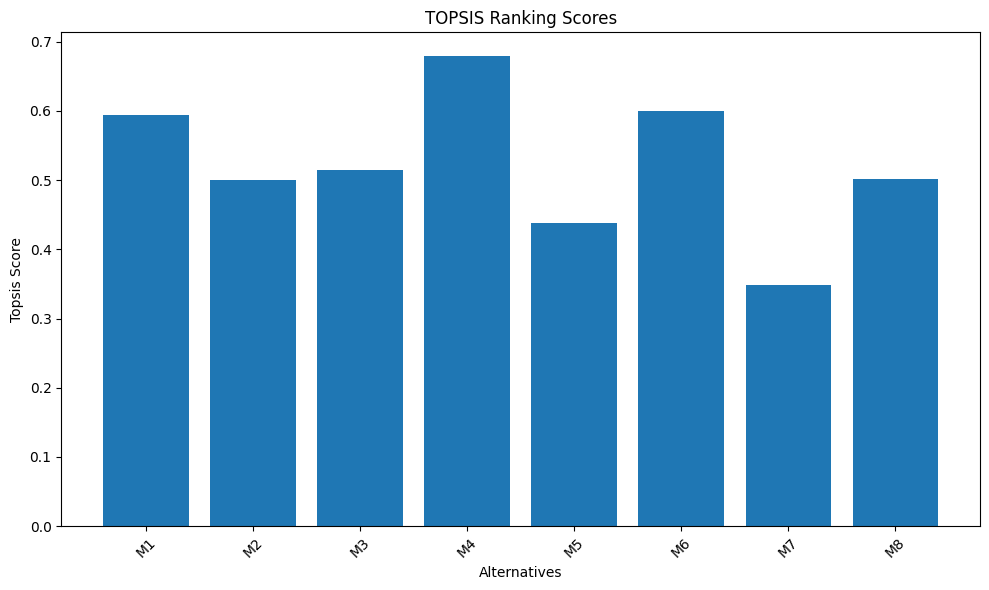

In [8]:
plt.figure(figsize=(10,6))
plt.bar(result.iloc[:,0], result["Topsis Score"])
plt.xlabel("Alternatives")
plt.ylabel("Topsis Score")
plt.title("TOPSIS Ranking Scores")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [9]:
files.download("topsis_result.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>